In [1]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
with open('intents.json') as content:
  data1 = json.load(content)

In [3]:
#getting all the data to lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [4]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [5]:
#printing the data
data

,inputs,tags
0,Hi,greeting
1,How are you,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Good day,greeting
5,Whats up,greeting
6,cya,goodbye
7,See you later,goodbye
8,Goodbye,goodbye
9,I am Leaving,goodbye


In [6]:
data = data.sample(frac=1)

In [7]:
#removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
23,when are you guys open,hours
21,what do you reccommend,shop
16,what is your name,name
11,how old,age
4,good day,greeting
19,id like to buy something,shop
10,have a good day,goodbye
6,cya,goodbye
20,whats on the menu,shop
17,what should i call you,name


In [8]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [9]:
input_shape = x_train.shape[1]
print(input_shape)

6


In [10]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  48
output length:  6


In [11]:
#creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [13]:
#training the model
train = model.fit(x_train,y_train,epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 1.7905 - accuracy: 0.1923
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 1.7890 - accuracy: 0.1538
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 1.7874 - accuracy: 0.1538
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 1.7858 - accuracy: 0.1538
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 1.7843 - accuracy: 0.1538
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 1.7827 - accuracy: 0.1923
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 1.7811 - accuracy: 0.1923
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 1.7795 - accuracy: 0.2308
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 1.7779 - accuracy: 0.2692
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 1.7763 - accuracy: 0.2692
Epoch 11/500
1/1 [============

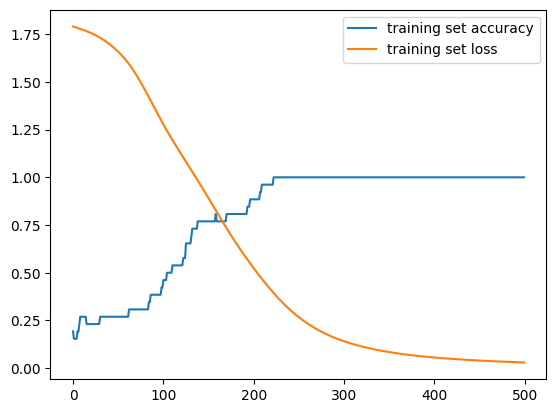

In [14]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [21]:
#chatting
import random

filename='intents.json'
file = open(filename,'r+')
file_data = json.load(file)

while True:
    truth_check_input = 0
    truth_check_response = 0
    texts_p = []
    prediction_input = input('You : ');
    prediction_input_clone = prediction_input

    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)

    #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()

    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    
    
   
    # Join new_data with file_data inside emp_details
    for i in file_data['intents']:
        if (response_tag in i['tag']) == True :
            #print(i['input'])
            
            for k in i['input']:
                print(k)
                if (k == prediction_input_clone) == True :
                    truth_check_input = 1
                    break
            for k in i['responses']:
                print(k)
                if (k == prediction_input_clone) == True :
                    truth_check_response = 1
                    break
            if truth_check_input == 0 :
                i['input'].append(prediction_input_clone)
                print(i['input'])
            if truth_check_response == 0 :
                i['responses'].append(prediction_input_clone)
                print(i['responses'])
            
    # Sets file's current position at offset.
    file.seek(0)
    # convert back to json.
    json.dump(file_data, file, indent = 4)
          
      
    print("Going Ballistic: ",random.choice(responses[response_tag]))
    if response_tag == "goodbye":
        file.close()
        break

You : Heya
1/1 [==============================] - 0s 24ms/step
cya
See you later
Goodbye
I am Leaving
Have a Good day
Heya
Sad to see you go :(
Talk to you later
Goodbye!
Heya
Going Ballistic:  Sad to see you go :(
